In [99]:
import seaborn as sns
from matplotlib import pyplot as plt
import pickle
from glob import glob
import numpy as np

from scipy.ndimage import gaussian_filter1d as smooth

In [100]:
data = {'itc': {'fac': [], 'bod': [], 'art': [], 'nat': [], 'fac0': [], 'bod0': [], 'art0': [], 'nat0': []},
        'pfc': {'fac': [], 'bod': [], 'art': [], 'nat': [], 'fac0': [], 'bod0': [], 'art0': [], 'nat0': []}}

# directory = 'G:\Results\SUA\dec\c-ovr-final\classification'
directory = r'G:\Results\SUA\dec\c-ovr-final-main\both-fast'
for fname in glob(f'{directory}\c-ovr-r-*-dpr.pickle'):
    with open(fname, 'rb') as handler:
        dpr = pickle.load(handler)

    for region in ['itc', 'pfc']:
        for category in ['fac', 'bod', 'art', 'nat']:
            data[region][category].append(np.mean(dpr[region][category], 0))

# for fname in glob(f'{directory}\c-ovr-p-*-dpr.pickle'):
#     with open(fname, 'rb') as handler:
#         dpr = pickle.load(handler)

#     for region in ['itc', 'pfc']:
#         for category in ['fac', 'bod', 'art', 'nat']:
#             data[region][category+"0"].append(np.mean(dpr[region][category], 0))

for region in ['itc', 'pfc']:
    for key in data[region].keys():
        data[region][key] = np.array(data[region][key])

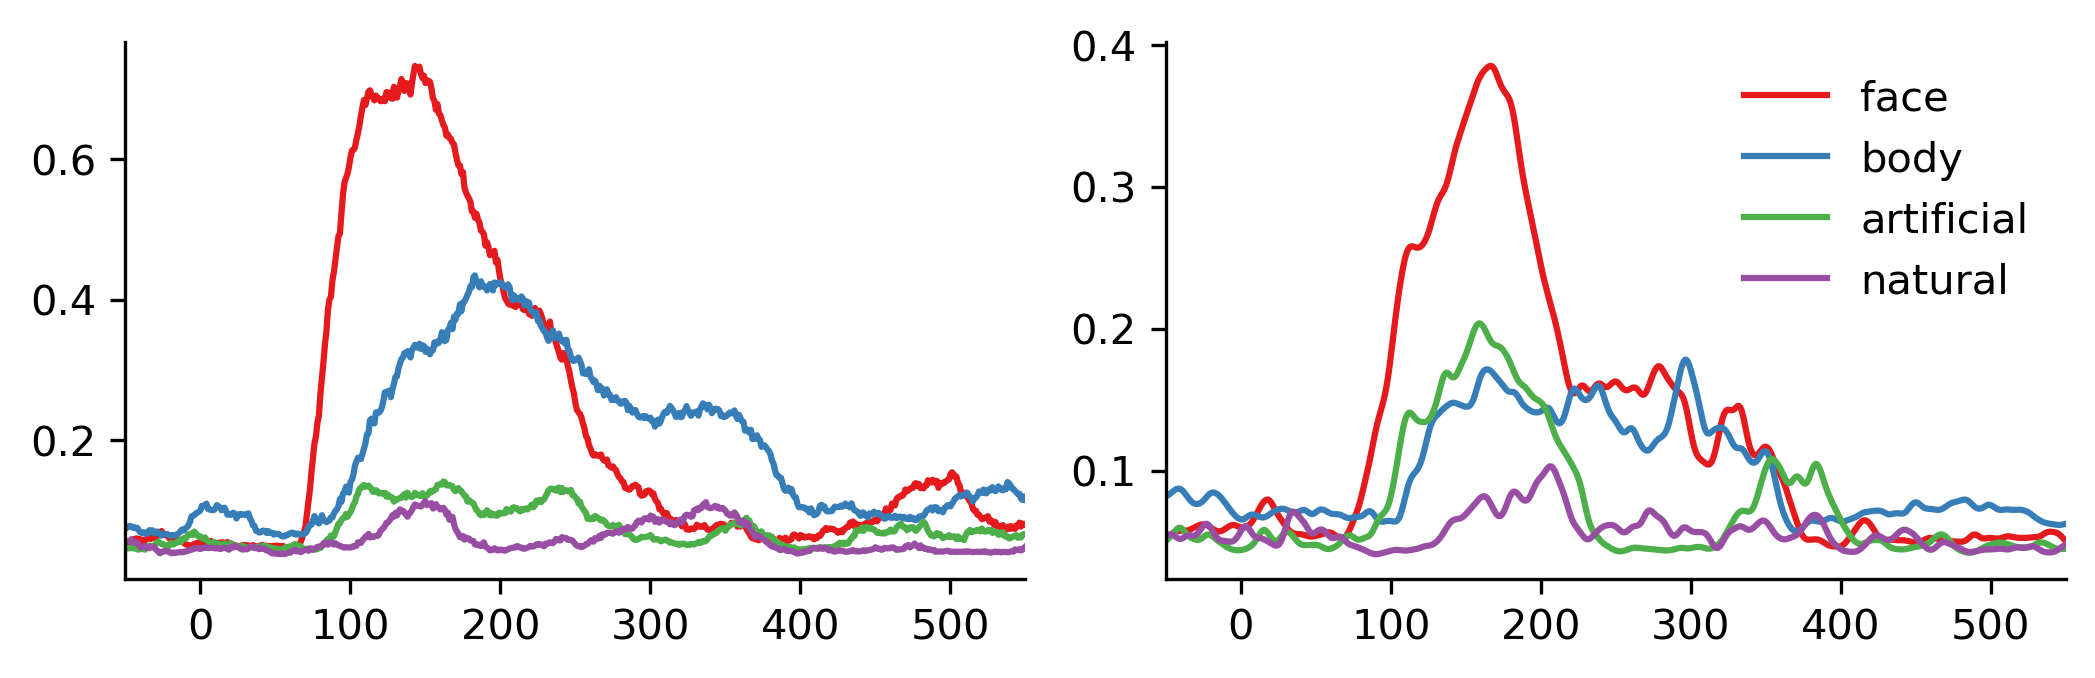

In [101]:
cm = 1 / 2.54
tim = np.arange(-200, 650) + 25
fig, axs = plt.subplots(1, 2, figsize=(18 * cm, 6 * cm), dpi=300, sharey=False)

for category in ['fac', 'bod', 'art', 'nat']:
# for category in ['fac', 'art', 'nat']:
    # mi = data['itc'][category] - data['itc'][category+"0"].mean(0)
    mi = data['itc'][category]
    # mp = data['pfc'][category] - data['pfc'][category+"0"].mean(0)
    mp = smooth(data['pfc'][category], 3)
    
    axs[0].plot(tim, mi.mean(0))
    # axs[0].fill_between(tim, mi.mean(0) + 1.96 * mi.std(0), mi.mean(0) - 1.96 * mi.std(0), alpha=.2, label='_nolegend_')

    axs[1].plot(tim, mp.mean(0))
    # axs[1].fill_between(tim, mp.mean(0) + 1.96 * mp.std(0), mp.mean(0) - 1.96 * mp.std(0), alpha=.2, label='_nolegend_')

for ax in axs:
    ax.set_xlim(-50, 550)
axs[1].legend(['face', 'body', 'artificial', 'natural'], frameon=False)
sns.despine()
fig.tight_layout()

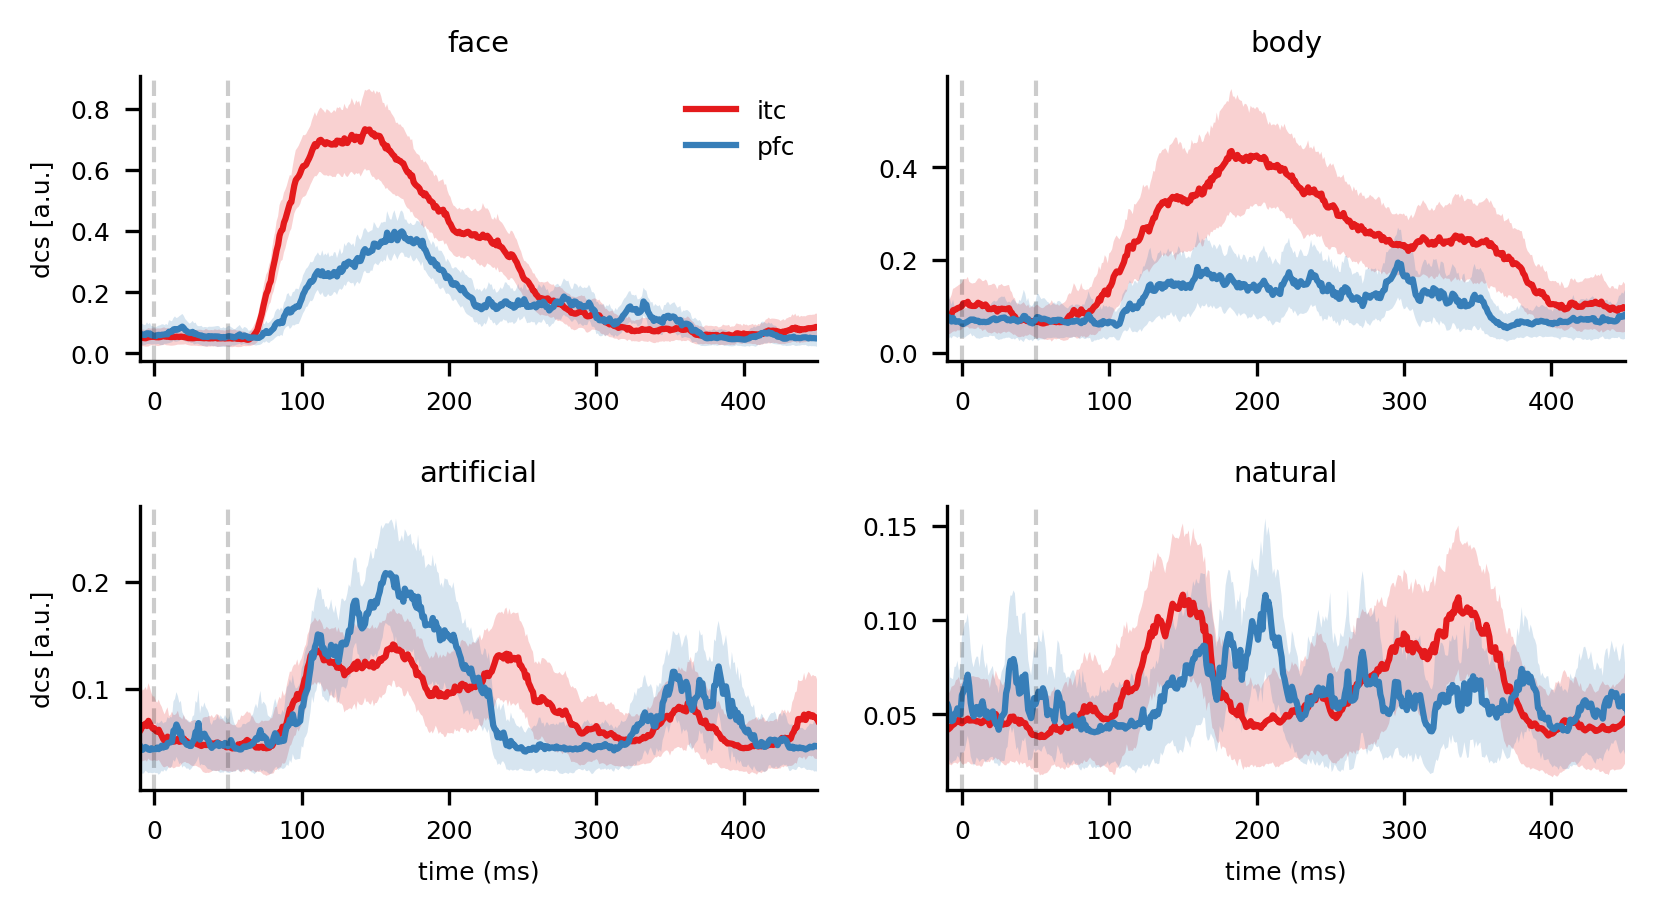

In [103]:
sns.set_palette('Set1')

cm = 1 / 2.54
fig, axs = plt.subplots(2, 2, figsize=(14.4 * cm, 8 * cm), dpi=300, sharey=False)
axs = axs.flatten()

for ax, category in zip(axs, ['fac', 'bod', 'art', 'nat']):
    # if category == 'bod': 
    #     continue
    # mi = data['itc'][category] - data['itc'][category+"0"].mean(0)
    mi = data['itc'][category]
    # mp = data['pfc'][category] - data['pfc'][category+"0"].mean(0)
    mp = data['pfc'][category]

    # mi = data['itc'][category]
    # mp = data['pfc'][category]

    # mi = smooth(mi, sigma=3)
    # mp = smooth(mp, sigma=3)
    
    ax.plot(tim, mi.mean(0), label='itc')
    ax.fill_between(tim, mi.mean(0) + mi.std(0), mi.mean(0) - mi.std(0), alpha=.2, label='_nolegend_')

    ax.plot(tim, mp.mean(0), label='pfc')
    ax.fill_between(tim, mp.mean(0) + mp.std(0), mp.mean(0) - mp.std(0), alpha=.2, label='_nolegend_')

for ax, title in zip(axs.flat, ['face', 'body', 'artificial', 'natural']):
    ax.axvline(0, color='k', ls='dashed', lw=1, alpha=.2, label='_nolegend_')
    ax.axvline(50, color='k', ls='dashed', lw=1, alpha=.2, label='_nolegend_')
    ax.set_xlim(-10, 450)
    ax.set_ylabel('')
    ax.tick_params(axis='both', which='major', labelsize=6)
    ax.set_title(title, fontsize=7)

axs[0].legend(frameon=False, fontsize=6)
axs[0].set_ylabel('dcs [a.u.]', fontsize=6)
axs[2].set_ylabel('dcs [a.u.]', fontsize=6)
axs[2].set_xlabel('time (ms)', fontsize=6)
axs[3].set_xlabel('time (ms)', fontsize=6)

sns.despine()
fig.tight_layout()

plt.savefig('dcs-per-category.pdf')

# Accuracies 

In [104]:
data = {'itc': {'fac': [], 'bod': [], 'art': [], 'nat': [], 'fac0': [], 'bod0': [], 'art0': [], 'nat0': []},
        'pfc': {'fac': [], 'bod': [], 'art': [], 'nat': [], 'fac0': [], 'bod0': [], 'art0': [], 'nat0': []}}

# directory = 'G:\Results\SUA\dec\c-ovr-final\classification'
directory = r'G:\Results\SUA\dec\c-ovr-final-main\both-fast'
for fname in glob(f'{directory}\c-ovr-r-*-cfn.pickle'):
    with open(fname, 'rb') as handler:
        cfn = pickle.load(handler)

    for region in ['itc', 'pfc']:
        for category in ['fac', 'bod', 'art', 'nat']:
            acc = np.array(cfn[region][category])
            acc = np.diagonal(acc, axis1=2, axis2=3).sum(2) / acc.sum((2, 3))
            data[region][category].append(np.mean(acc, 0))

# for fname in glob(f'{directory}\c-ovr-p-*-dpr.pickle'):
#     with open(fname, 'rb') as handler:
#         dpr = pickle.load(handler)

#     for region in ['itc', 'pfc']:
#         for category in ['fac', 'bod', 'art', 'nat']:
#             data[region][category+"0"].append(np.mean(dpr[region][category], 0))

for region in ['itc', 'pfc']:
    for key in data[region].keys():
        data[region][key] = np.array(data[region][key])

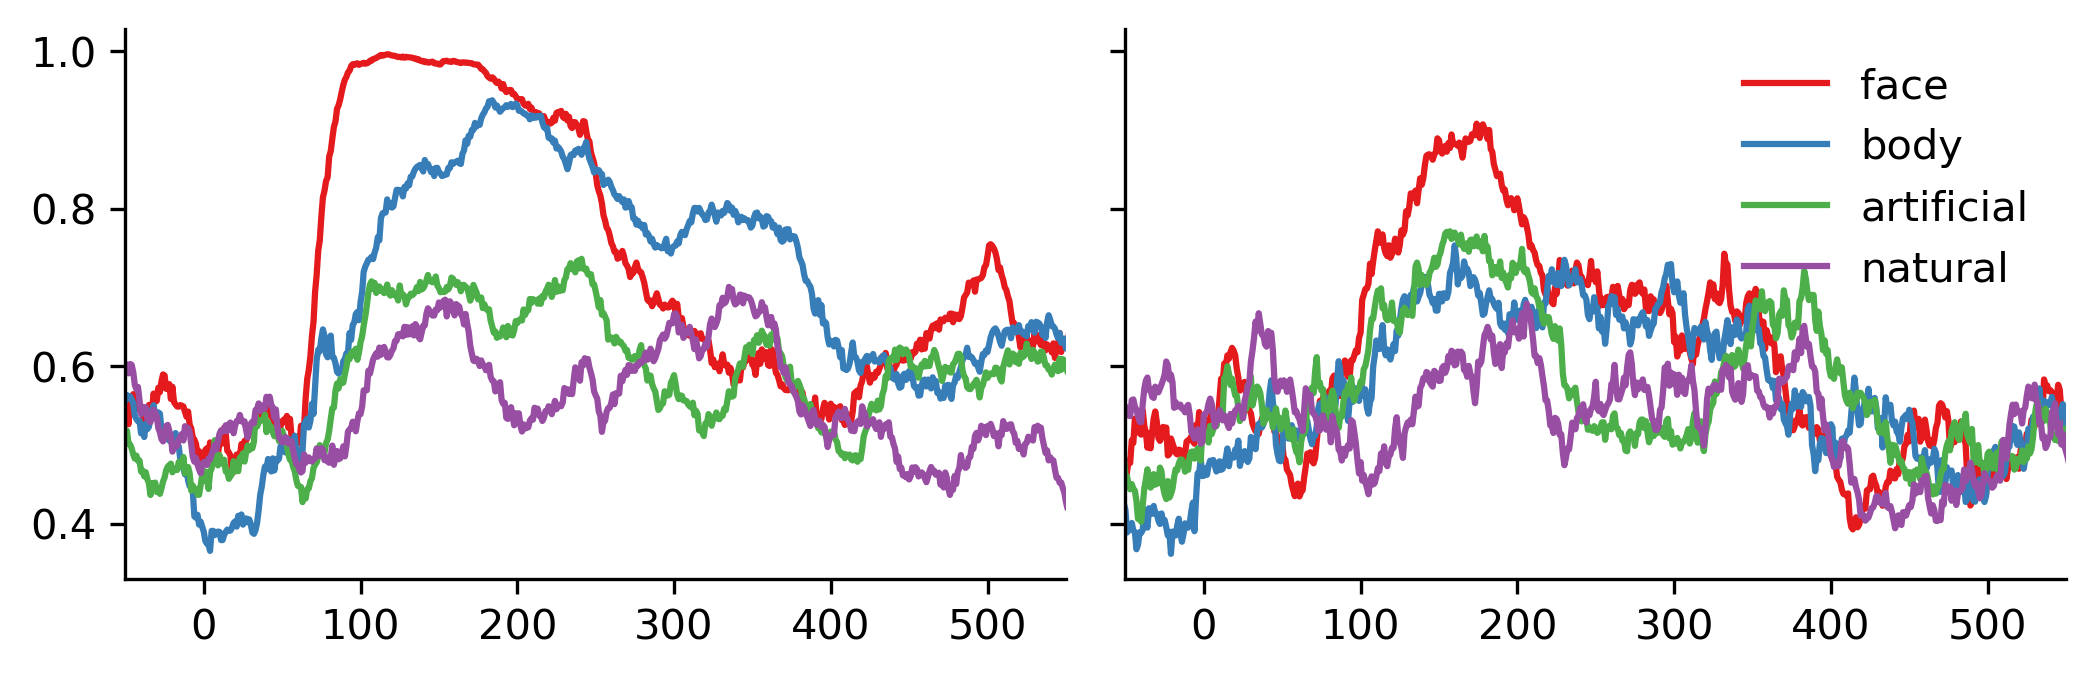

In [107]:
cm = 1 / 2.54
tim = np.arange(-200, 650) + 25
fig, axs = plt.subplots(1, 2, figsize=(18 * cm, 6 * cm), dpi=300, sharey=True)

for category in ['fac', 'bod', 'art', 'nat']:
# for category in ['fac', 'art', 'nat']:
    # mi = data['itc'][category] - data['itc'][category+"0"].mean(0)
    mi = data['itc'][category]
    # mp = data['pfc'][category] - data['pfc'][category+"0"].mean(0)
    mp = data['pfc'][category]
    
    axs[0].plot(tim, mi.mean(0))
    # axs[0].fill_between(tim, mi.mean(0) + 1.96 * mi.std(0), mi.mean(0) - 1.96 * mi.std(0), alpha=.2, label='_nolegend_')

    axs[1].plot(tim, mp.mean(0))
    # axs[1].fill_between(tim, mp.mean(0) + 1.96 * mp.std(0), mp.mean(0) - 1.96 * mp.std(0), alpha=.2, label='_nolegend_')

for ax in axs:
    ax.set_xlim(-50, 550)
axs[1].legend(['face', 'body', 'artificial', 'natural'], frameon=False)
sns.despine()
fig.tight_layout()

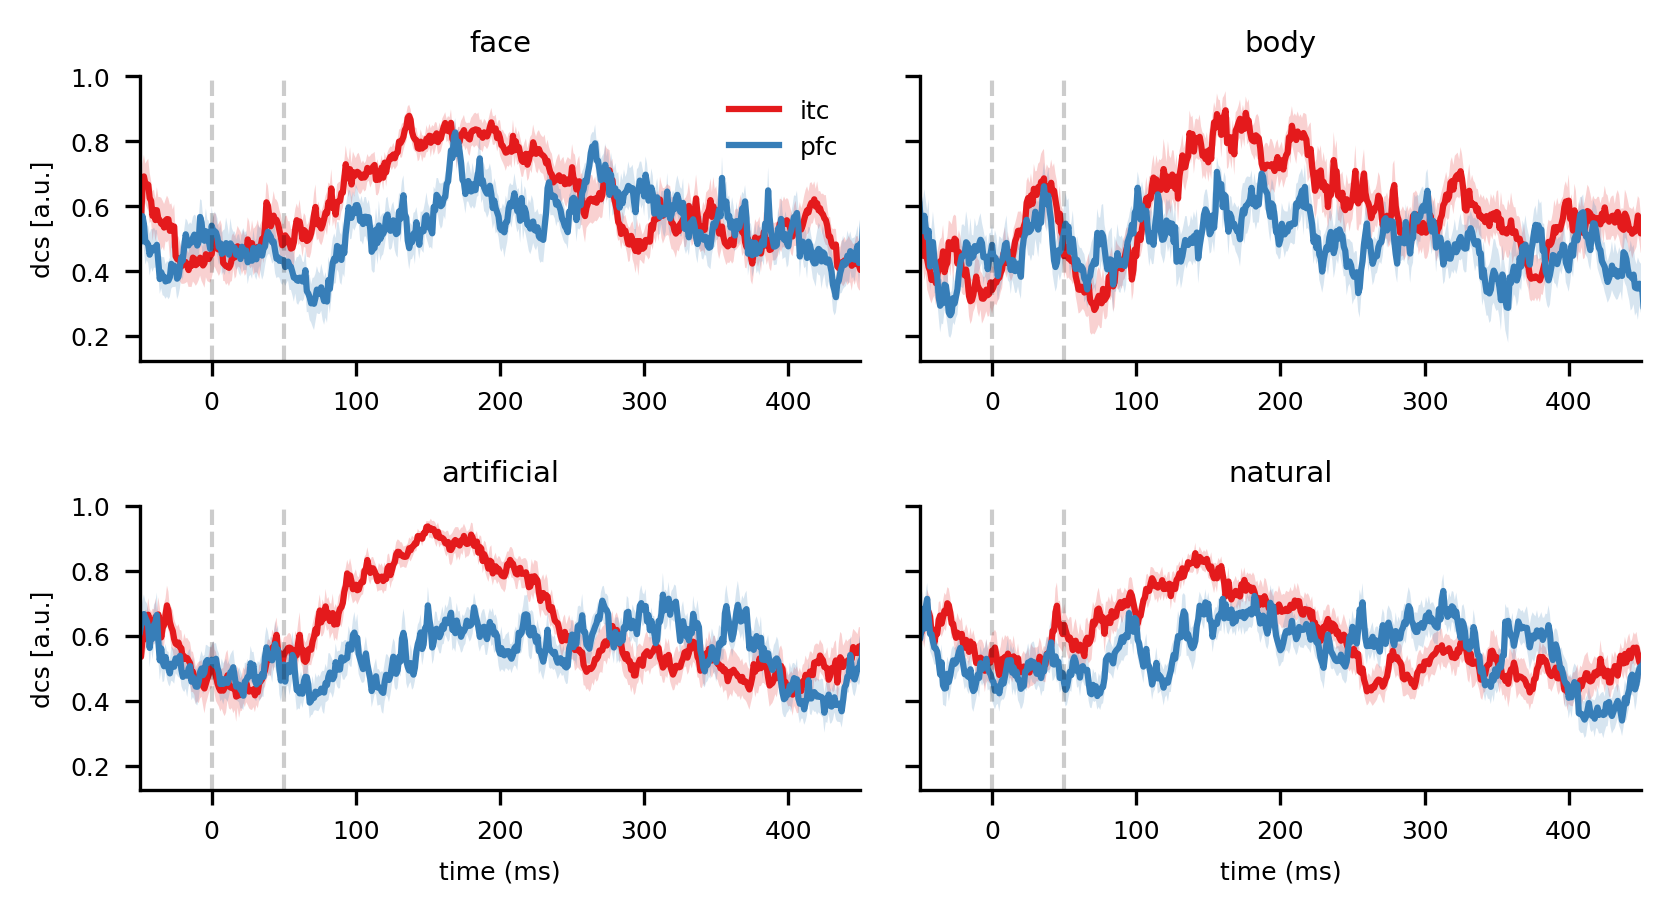

In [72]:
sns.set_palette('Set1')

cm = 1 / 2.54
fig, axs = plt.subplots(2, 2, figsize=(14.4 * cm, 8 * cm), dpi=300, sharey=True)
axs = axs.flatten()

for ax, category in zip(axs, ['fac', 'bod', 'art', 'nat']):
    # mi = data['itc'][category] - data['itc'][category+"0"].mean(0)
    mi = data['itc'][category]
    # mp = data['pfc'][category] - data['pfc'][category+"0"].mean(0)
    mp = data['pfc'][category]

    # mi = data['itc'][category]
    # mp = data['pfc'][category]

    # mi = smooth(mi, sigma=3)
    # mp = smooth(mp, sigma=3)
    
    ax.plot(tim, mi.mean(0), label='itc')
    ax.fill_between(tim, mi.mean(0) + mi.std(0), mi.mean(0) - mi.std(0), alpha=.2, label='_nolegend_')

    ax.plot(tim, mp.mean(0), label='pfc')
    ax.fill_between(tim, mp.mean(0) + mp.std(0), mp.mean(0) - mp.std(0), alpha=.2, label='_nolegend_')

for ax, title in zip(axs.flat, ['face', 'body', 'artificial', 'natural']):
    ax.axvline(0, color='k', ls='dashed', lw=1, alpha=.2, label='_nolegend_')
    ax.axvline(50, color='k', ls='dashed', lw=1, alpha=.2, label='_nolegend_')
    ax.set_xlim(-50, 450)
    ax.set_ylabel('')
    ax.tick_params(axis='both', which='major', labelsize=6)
    ax.set_title(title, fontsize=7)

axs[0].legend(frameon=False, fontsize=6)
axs[0].set_ylabel('dcs [a.u.]', fontsize=6)
axs[2].set_ylabel('dcs [a.u.]', fontsize=6)
axs[2].set_xlabel('time (ms)', fontsize=6)
axs[3].set_xlabel('time (ms)', fontsize=6)

sns.despine()
fig.tight_layout()

plt.savefig('dcs-per-category.pdf')

# Onsets

In [45]:
def fonsets(tim, m, nsw: int=5):
    onsets = []
    
    bl = (tim < 10) & (tim >= -10)

    for rep in range(m.shape[0]):
        rm = m[rep, :]
        rm -= rm[bl].mean()

        maxv = rm[(tim > 50) & (tim < 250)].max()
        thresh = 0.15 * (maxv)
        ht = rm > thresh
        cht = np.convolve(ht, np.ones(nsw), 'same') == nsw

        cht[tim<50] = 0

        onsets.extend(tim[np.argwhere(cht)[0] - nsw])
    return np.array(onsets)

C:\Users\User\AppData\Local\Temp/ipykernel_32060/533885475.py:7: RuntimeWarning: Mean of empty slice.
  X_itc = data['itc'][category] - data['itc'][category+"0"].mean(0)
c:\Users\User\anaconda3\envs\ipm\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\User\AppData\Local\Temp/ipykernel_32060/533885475.py:8: RuntimeWarning: Mean of empty slice.
  X_pfc = data['pfc'][category] - data['pfc'][category+"0"].mean(0)


IndexError: index 0 is out of bounds for axis 0 with size 0

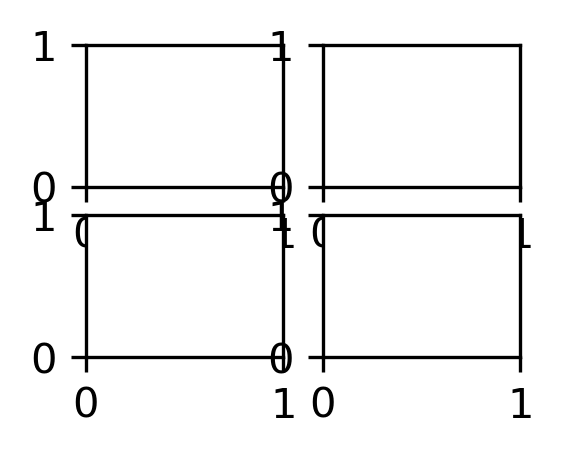

In [46]:
cm = 1 / 2.54
fig, axs = plt.subplots(2, 2, figsize=(4.75 * cm, 3.5 * cm), dpi=300, sharex=False, sharey=False)
axs = axs.flatten()

for ax, category in zip(axs, ['fac', 'bod', 'art', 'nat']):

      X_itc = data['itc'][category] - data['itc'][category+"0"].mean(0)
      X_pfc = data['pfc'][category] - data['pfc'][category+"0"].mean(0)

      nsw = 15

      itc_onsets = fonsets(tim, X_itc, nsw)
      pfc_onsets = fonsets(tim, X_pfc, nsw)

      df = {'onsets': np.concatenate([itc_onsets, pfc_onsets]),
            'region': np.concatenate([np.full(np.shape(itc_onsets), 'ITC', dtype=object), 
                  np.full(np.shape(pfc_onsets), 'PFC', dtype=object)])}

      h = sns.histplot(data=df, x='onsets', hue='region', ax=ax, element='bars', kde=True, bins=20, line_kws={'linewidth': 1})

for ax, title in zip(axs.flat, ['face', 'body', 'artificial', 'natural']):
      ax.set_ylabel('')
      ax.set_xlabel('')
      ax.legend([], frameon=False)
      ax.tick_params(axis='both', which='major', labelsize=5)
      # ax.set_title(title, fontsize=7)

sns.despine()
fig.tight_layout()

plt.savefig('dcs-onsets.pdf')

In [9]:
import pandas as pd

for iter, category in enumerate(['fac', 'bod', 'art', 'nat']):

    X_itc = data['itc'][category] - data['itc'][category+"0"].mean(0)
    X_pfc = data['pfc'][category] - data['pfc'][category+"0"].mean(0)

    nsw = 15

    itc_onsets = fonsets(tim, X_itc, nsw)
    pfc_onsets = fonsets(tim, X_pfc, nsw)

    if iter==0:
        df = pd.DataFrame(
            {'onsets': np.concatenate([itc_onsets, pfc_onsets]),
             'region': np.concatenate([np.full(np.shape(itc_onsets), 'ITC', dtype=object), 
                                       np.full(np.shape(pfc_onsets), 'PFC', dtype=object)]),
             'category': category})
    else:
        _df = pd.DataFrame({
            'onsets': np.concatenate([itc_onsets, pfc_onsets]),
            'region': np.concatenate([np.full(np.shape(itc_onsets), 'ITC', dtype=object), 
                                      np.full(np.shape(pfc_onsets), 'PFC', dtype=object)]),
            'category': category})
        df = pd.concat((df, _df), ignore_index=True)

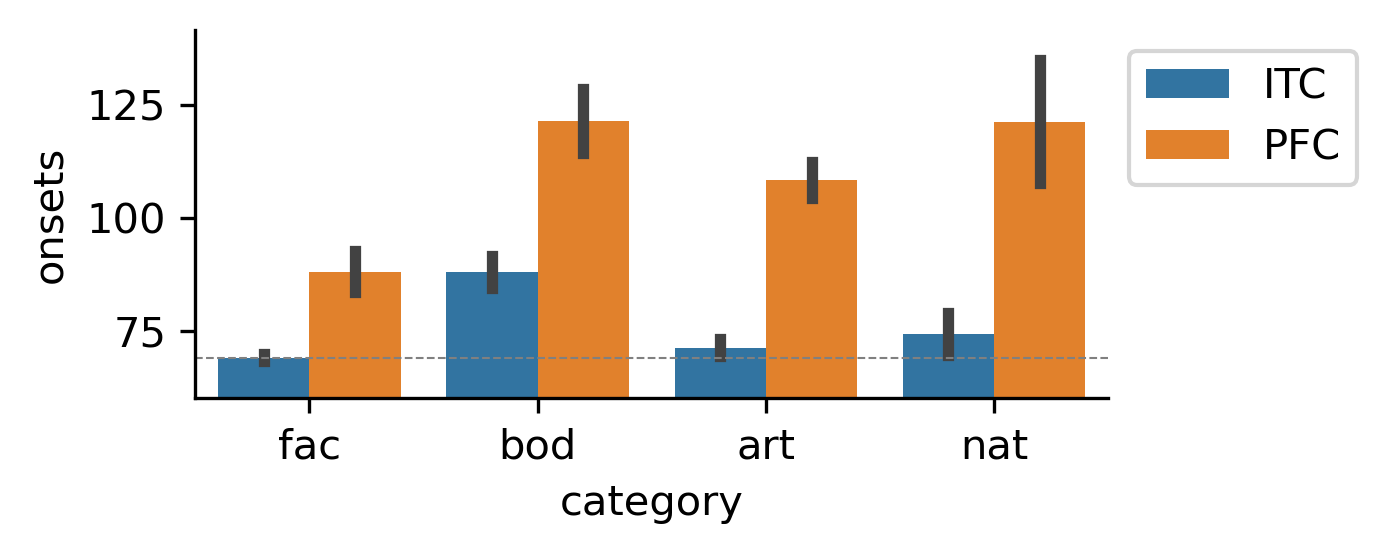

In [10]:
cm = 1 / 2.54
fig, axs = plt.subplots(1, 1, figsize=(12 * cm, 5 * cm), dpi=300)

barplot = sns.barplot(data=df, x='category', y='onsets', hue='region', ci='sd')
barplot.legend (bbox_to_anchor = (1, 1))
axs.axhline(69, c='gray', ls='--', lw=.5)
axs.set_ylim(60, axs.get_ylim()[1])
sns.despine()
fig.tight_layout()

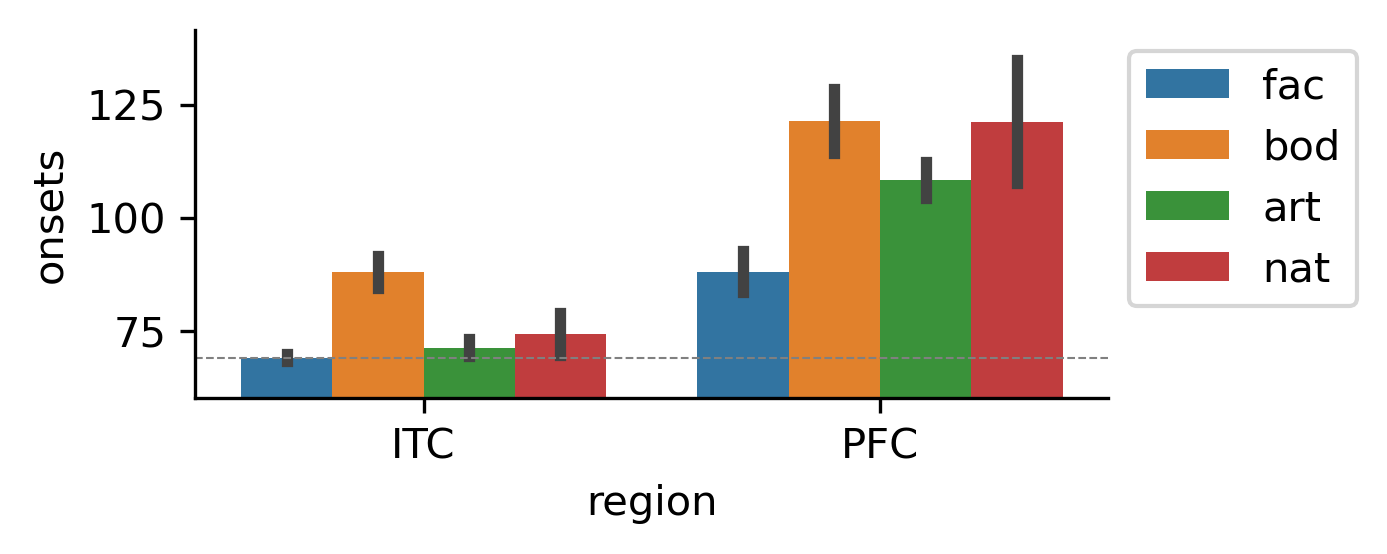

In [11]:
cm = 1 / 2.54
fig, axs = plt.subplots(1, 1, figsize=(12 * cm, 5 * cm), dpi=300)

barplot = sns.barplot(data=df, hue='category', y='onsets', x='region', ci='sd')
barplot.legend (bbox_to_anchor = (1, 1))
axs.axhline(69, c='gray', ls='--', lw=.5)
axs.set_ylim(60, axs.get_ylim()[1])
sns.despine()
fig.tight_layout()

In [12]:
category = 'nat'

x1 = df[(df.region=='ITC') & (df.category==category)].onsets.to_numpy()
x2 = df[(df.region=='PFC') & (df.category==category)].onsets.to_numpy()

print(f"p-value for {category}: {1 - np.mean(((x2 - x1.reshape(-1, 1)) > 0))}")

p-value for nat: 0.013688888888888862


In [13]:
category1 = 'art'
category2 = 'fac'
region = 'ITC'


x1 = df[(df.region==region) & (df.category==category1)].onsets.to_numpy()
x2 = df[(df.region==region) & (df.category==category2)].onsets.to_numpy()

print(f"p-value for {category2} > {category1}: {1 - np.mean(((x2 - x1.reshape(-1, 1)) > 0))} ({region})")

p-value for fac > art: 0.9056 (ITC)


# Accuracy

In [14]:
from tqdm.notebook import tqdm

data_a = {'itc': {'fac': [], 'bod': [], 'art': [], 'nat': [], 'fac0': [], 'bod0': [], 'art0': [], 'nat0': []},
        'pfc': {'fac': [], 'bod': [], 'art': [], 'nat': [], 'fac0': [], 'bod0': [], 'art0': [], 'nat0': []}}

for fname in tqdm(glob('G:\Results\SUA\dec\c-ovr-final\classification\c-ovr-r-*-cfn.pickle')):
    with open(fname, 'rb') as handler:
        dxt = pickle.load(handler)

    for region in ['itc', 'pfc']:
        for category in ['fac', 'bod', 'art', 'nat']:
            X = np.array(dxt[region][category])
            Z = X.diagonal(axis1=2, axis2=3).sum(2) / X.sum((2, 3))
            data_a[region][category].append(Z.mean(0))

for fname in tqdm(glob('G:\Results\SUA\dec\c-ovr-final\classification\c-ovr-p-*-cfn.pickle')):
    with open(fname, 'rb') as handler:
        dxt = pickle.load(handler)

    for region in ['itc', 'pfc']:
        for category in ['fac', 'bod', 'art', 'nat']:
            X = np.array(dxt[region][category])
            Z = X.diagonal(axis1=2, axis2=3).sum(2) / X.sum((2, 3))
            data_a[region][category+"0"].append(Z.mean(0))

for region in ['itc', 'pfc']:
    for key in data_a[region].keys():
        data_a[region][key] = np.array(data_a[region][key])

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

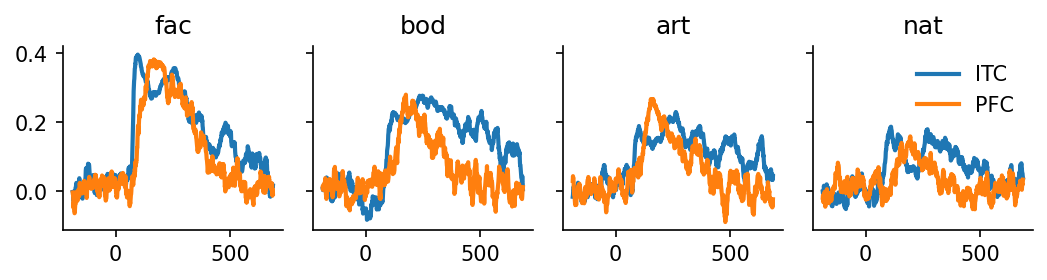

In [15]:
cm = 1 / 2.54
tim = np.arange(-200, 675, step=1) + 12.5
fig, axs = plt.subplots(1, 4, figsize=(18 * cm, 5 * cm), dpi=150, sharey=True, sharex=True, squeeze=False)
axs = axs.flatten()

for ax, category in zip(axs[:4], ['fac', 'bod', 'art', 'nat']):
    Z = data_a['itc'][category]
    Z0 = data_a['itc'][category+"0"]
    ax.plot(tim, Z.mean(0) - Z0.mean(0), lw=2, label="ITC")

    Z = data_a['pfc'][category]
    Z0 = data_a['pfc'][category+"0"]
    ax.plot(tim, Z.mean(0) - Z0.mean(0), lw=2, label="PFC")

    ax.set_title(category)

axs[-1].legend(frameon=False)
sns.despine()
fig.tight_layout()

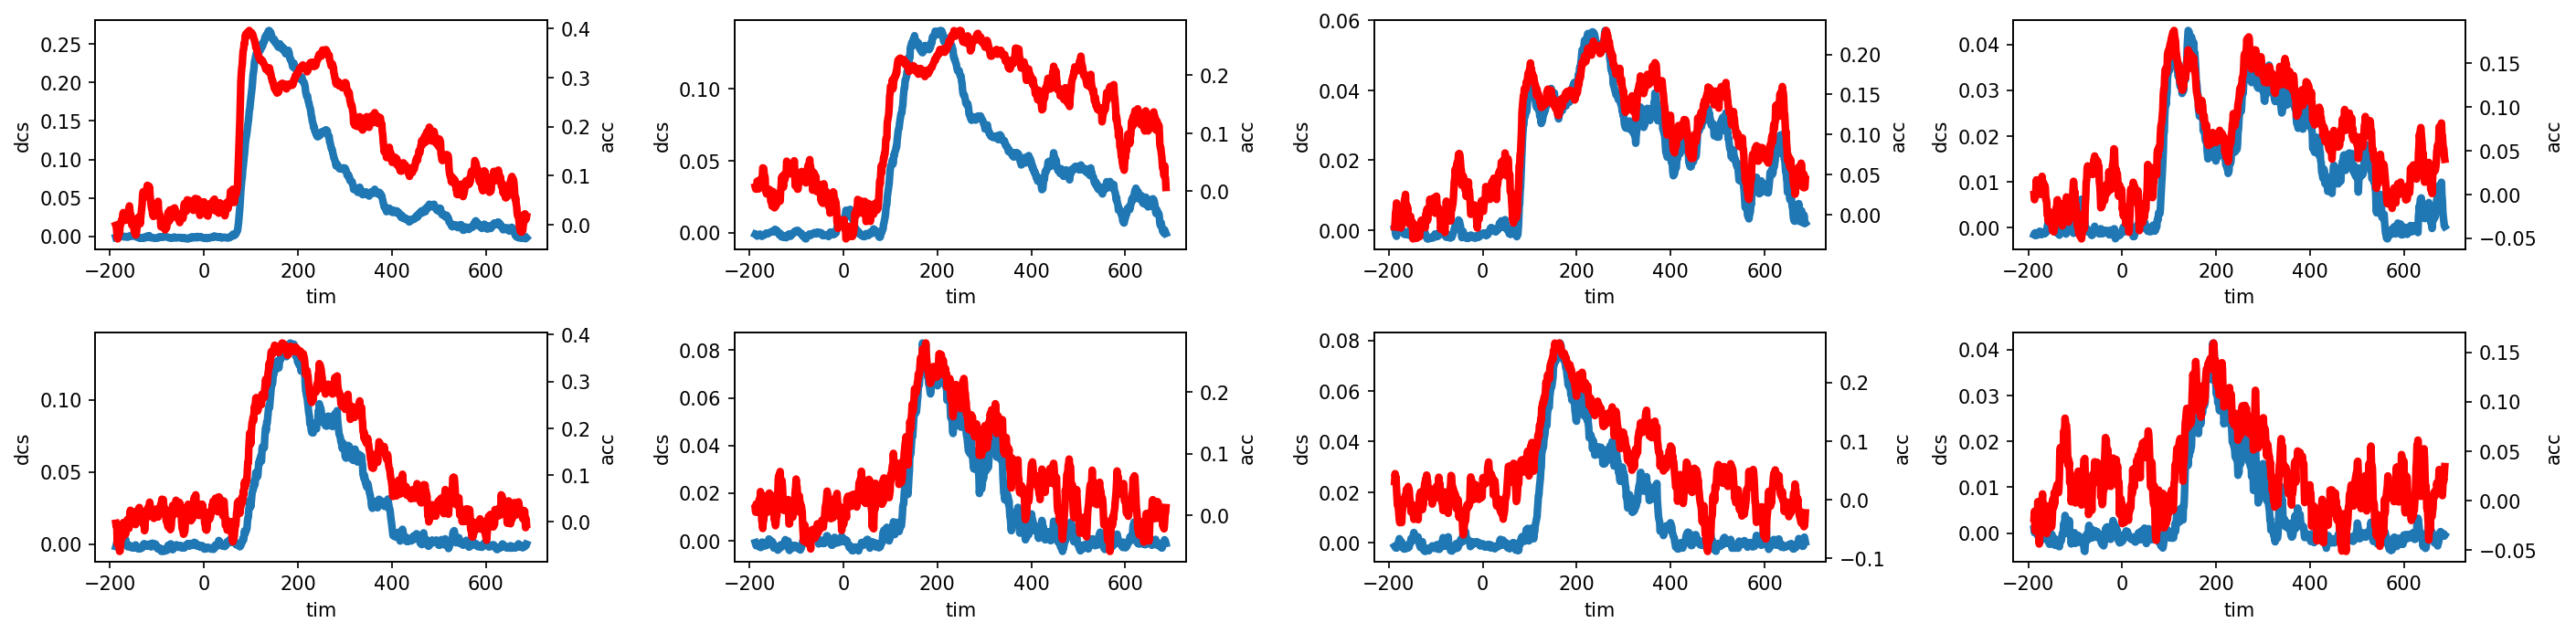

In [104]:
cm = 1 / 2.54
fig, axs = plt.subplots(2, 4, figsize=(48 * cm, 12 * cm), dpi=150)
axs = axs.flatten()

for ax, category in zip(axs[:4], ['fac', 'bod', 'art', 'nat']):
    # X = data['itc'][category]
    # Y = data_a['itc'][category]
    # X = data['itc'][f'{category}0']
    # Y = data_a['itc'][f'{category}0']
    # df = pd.DataFrame({'tim': np.tile(tim, (100, 1)).flatten(), 'dcs': X.flatten(), 'acc':Y.flatten()})
    X = data['itc'][category] - data['itc'][f'{category}0'].mean(0)
    Y = data_a['itc'][category] - data_a['itc'][f'{category}0'].mean(0)
    df = pd.DataFrame({'tim': np.tile(tim, (150, 1)).flatten(), 'dcs': X.flatten(), 'acc':Y.flatten()})
    sns.lineplot(data=df, x='tim', y='dcs', ax=ax, ci=None, lw=4)
    sns.lineplot(data=df, x='tim', y='acc', ax=ax.twinx(), ci=None, color='r', lw=4)
    
# for ax in axs[:4]:
#     ax.twinx().set_yticks([])
#     ax.set_yticks([])

for ax, category in zip(axs[4:], ['fac', 'bod', 'art', 'nat']):
    # X = data['pfc'][category]
    # Y = data_a['pfc'][category]
    # X = data['pfc'][f'{category}0']
    # Y = data_a['pfc'][f'{category}0']
    # df = pd.DataFrame({'tim': np.tile(tim, (100, 1)).flatten(), 'dcs': X.flatten(), 'acc':Y.flatten()})
    X = data['pfc'][category] - data['pfc'][f'{category}0'].mean(0)
    Y = data_a['pfc'][category] - data_a['pfc'][f'{category}0'].mean(0)
    df = pd.DataFrame({'tim': np.tile(tim, (150, 1)).flatten(), 'dcs': X.flatten(), 'acc':Y.flatten()})
    sns.lineplot(data=df, x='tim', y='dcs', ax=ax, ci=None, lw=4)
    sns.lineplot(data=df, x='tim', y='acc', ax=ax.twinx(), ci=None, color='r', lw=4)

# g.legend(handles=[Line2D([], [], marker='_', color="g", label='column1'), Line2D([], [], marker='_', color="b", label='column2')])

# sns.despine(right=False)
fig.tight_layout()

# LDA

In [90]:
import seaborn as sns
from matplotlib import pyplot as plt
import pickle
from glob import glob
import numpy as np

from scipy.ndimage import gaussian_filter1d as smooth

data = {'itc': {'fac': [], 'bod': [], 'art': [], 'nat': [], 'fac0': [], 'bod0': [], 'art0': [], 'nat0': []},
        'pfc': {'fac': [], 'bod': [], 'art': [], 'nat': [], 'fac0': [], 'bod0': [], 'art0': [], 'nat0': []}}

# directory = 'G:\Results\SUA\dec\c-ovr-final\classification'
directory = r'G:\Results\SUA\dec\lda'
for fname in glob(f'{directory}\c-ovr-r-*-dpr.pickle'):
    with open(fname, 'rb') as handler:
        dpr = pickle.load(handler)

    for region in ['itc', 'pfc']:
        for category in ['fac', 'bod', 'art', 'nat']:
            data[region][category].append(np.mean(dpr[region][category], 0))

# for fname in glob(f'{directory}\c-ovr-p-*-dpr.pickle'):
#     with open(fname, 'rb') as handler:
#         dpr = pickle.load(handler)

#     for region in ['itc', 'pfc']:
#         for category in ['fac', 'bod', 'art', 'nat']:
#             data[region][category+"0"].append(np.mean(dpr[region][category], 0))

for region in ['itc', 'pfc']:
    for key in data[region].keys():
        data[region][key] = np.array(data[region][key])

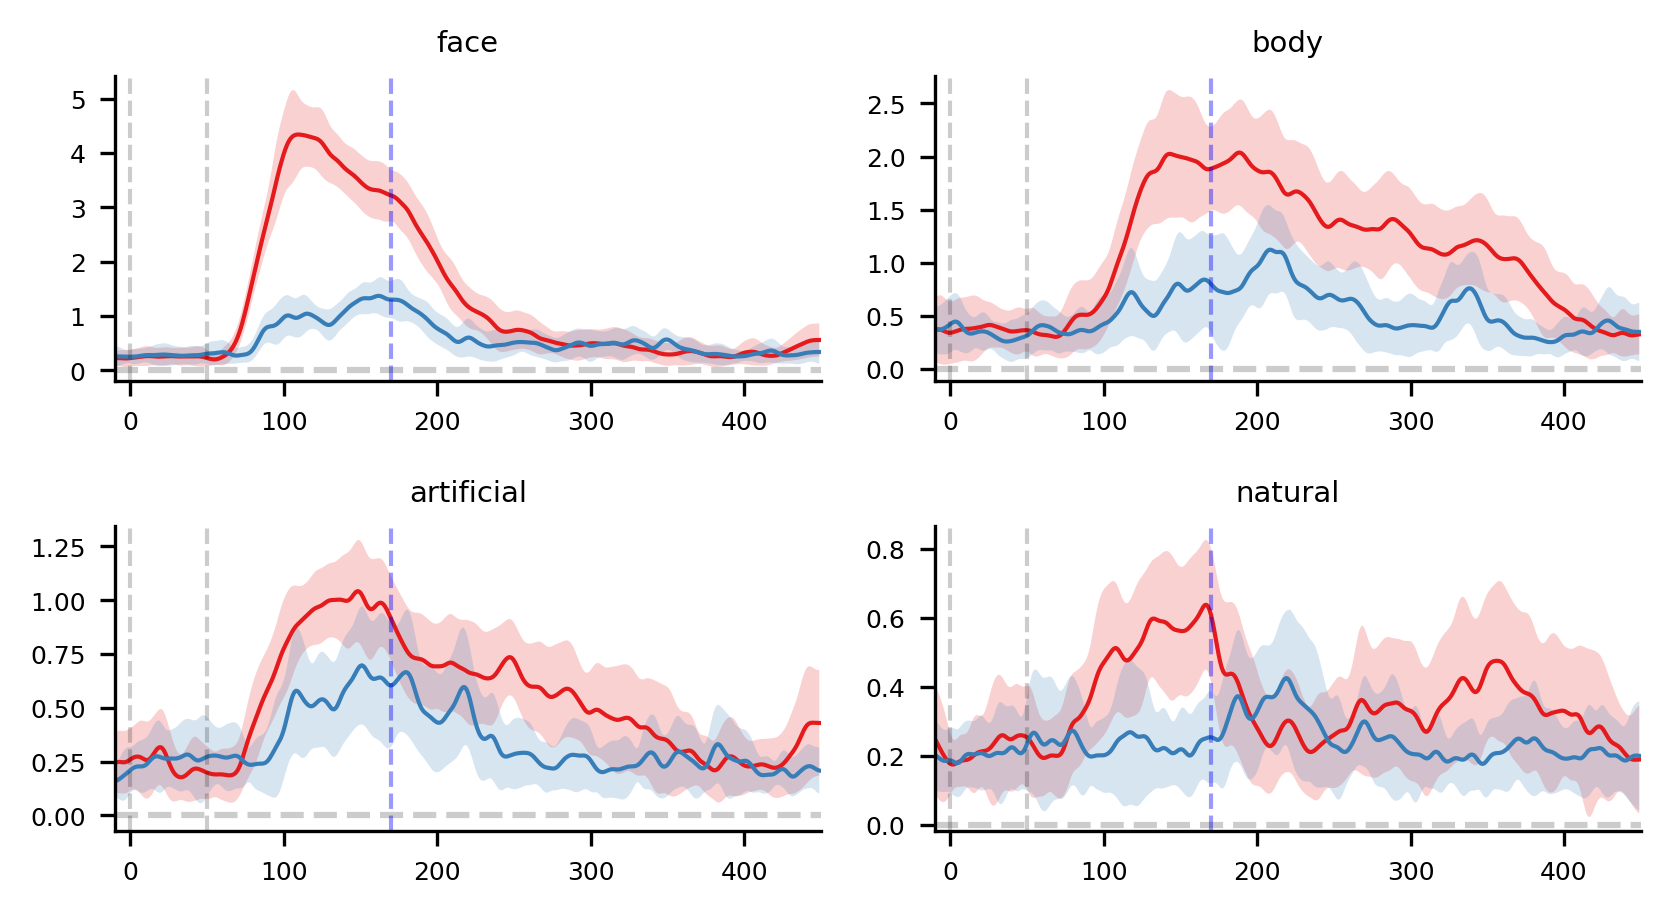

In [91]:
sns.set_palette('Set1')
tim = np.arange(-200, 650) + 25
itim = (tim < 450) & (tim >= -100)
tim = tim[itim]

cm = 1 / 2.54
fig, axs = plt.subplots(2, 2, figsize=(14.4 * cm, 8 * cm), dpi=300, sharey=False)
axs = axs.flatten()

for ax, category in zip(axs, ['fac', 'bod', 'art', 'nat']):
    m = smooth(np.abs(data['itc'][category][:, itim]), 3)
    ax.plot(tim, m.mean(0), lw=1)
    ax.fill_between(tim, m.mean(0) - m.std(0), m.mean(0) + m.std(0), alpha=.2)

    m = smooth(np.abs(data['pfc'][category][:, itim]), 3)
    ax.plot(tim, m.mean(0), lw=1)
    ax.fill_between(tim, m.mean(0) - m.std(0), m.mean(0) + m.std(0), alpha=.2)

for ax, title in zip(axs.flat, ['face', 'body', 'artificial', 'natural']):
    ax.axvline(0, color='k', ls='dashed', lw=1, alpha=.2, label='_nolegend_')
    ax.axvline(50, color='k', ls='dashed', lw=1, alpha=.2, label='_nolegend_')
    ax.axvline(170, color='b', ls='dashed', lw=1, alpha=.4, label='_nolegend_')
    ax.axhline(0, c='k', ls='--', alpha=.2)
    ax.set_xlim(-10, 450)
    ax.set_ylabel('')
    ax.tick_params(axis='both', which='major', labelsize=6)
    ax.set_title(title, fontsize=7)

# axs[0].legend(frameon=False, fontsize=6)
# axs[0].set_ylabel('dcs [a.u.]', fontsize=6)
# axs[2].set_ylabel('dcs [a.u.]', fontsize=6)
# axs[2].set_xlabel('time (ms)', fontsize=6)
# axs[3].set_xlabel('time (ms)', fontsize=6)

sns.despine()
fig.tight_layout()